In [136]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [137]:
df = pd.read_csv('New_Weekend_Model_Data_NoWeather_Crime.csv')
df

,Unnamed: 0,longitude,latitude,Hour,Day of Week,Cluster,total_weekend_trips,Normalized_Score
0,0,-73.980415,40.738564,0,6,225,35.0,0.367347
1,1,-73.981323,40.737522,0,6,225,35.0,0.367347
2,2,-73.980721,40.738167,0,6,225,35.0,0.367347
3,3,-73.980370,40.738625,0,6,225,35.0,0.367347
4,4,-73.981277,40.737244,0,6,225,35.0,0.367347
...,...,...,...,...,...,...,...,...
342508,461323,-73.988777,40.778099,6,5,386,2.0,0.000000
342509,461324,-73.978294,40.752399,3,6,120,22.0,0.142857
342510,461335,-73.970558,40.799046,2,5,447,5.0,0.306122
342511,461336,-73.965858,40.789978,4,5,197,7.0,0.000000


In [138]:
df = df.drop(columns=["Unnamed: 0"])
df

,longitude,latitude,Hour,Day of Week,Cluster,total_weekend_trips,Normalized_Score
0,-73.980415,40.738564,0,6,225,35.0,0.367347
1,-73.981323,40.737522,0,6,225,35.0,0.367347
2,-73.980721,40.738167,0,6,225,35.0,0.367347
3,-73.980370,40.738625,0,6,225,35.0,0.367347
4,-73.981277,40.737244,0,6,225,35.0,0.367347
...,...,...,...,...,...,...,...
342508,-73.988777,40.778099,6,5,386,2.0,0.000000
342509,-73.978294,40.752399,3,6,120,22.0,0.142857
342510,-73.970558,40.799046,2,5,447,5.0,0.306122
342511,-73.965858,40.789978,4,5,197,7.0,0.000000


In [139]:
df[df["Day of Week"] == 5]

,longitude,latitude,Hour,Day of Week,Cluster,total_weekend_trips,Normalized_Score
20,-73.973053,40.793209,13,5,7,37.0,0.408163
21,-73.974113,40.791660,13,5,7,37.0,0.408163
22,-73.973000,40.790482,13,5,7,37.0,0.408163
23,-73.974037,40.791443,13,5,7,37.0,0.408163
24,-73.972992,40.792900,13,5,7,37.0,0.408163
...,...,...,...,...,...,...,...
342501,-74.005623,40.738163,5,5,96,3.0,0.000000
342506,-73.952049,40.810581,6,5,354,3.0,0.000000
342508,-73.988777,40.778099,6,5,386,2.0,0.000000
342510,-73.970558,40.799046,2,5,447,5.0,0.306122


In [140]:
df["Day of Week"].unique()

array([6, 5])

In [141]:
df.isna().sum()

longitude              0
latitude               0
Hour                   0
Day of Week            0
Cluster                0
total_weekend_trips    0
Normalized_Score       0
dtype: int64

## Create two separate data frames for test and train

In [142]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [143]:
print(f'Original: {len(df)} rows')
print(f'Training: {len(df_train)} rows')
print(f'Testing: {len(df_test)} rows')

Original: 342513 rows
Training: 239759 rows
Testing: 102754 rows


In [144]:
df_train.head()

,longitude,latitude,Hour,Day of Week,Cluster,total_weekend_trips,Normalized_Score
60241,-73.952858,40.776402,0,5,409,61.0,0.795918
139765,-73.977539,40.784294,23,6,358,26.0,0.183673
262627,-73.988365,40.723602,11,5,366,31.0,0.285714
274408,-73.982430,40.768532,11,5,50,71.0,0.857143
235825,-73.971817,40.794849,8,6,397,18.0,0.081633


In [145]:
df_test.head()

,longitude,latitude,Hour,Day of Week,Cluster,total_weekend_trips,Normalized_Score
309429,-74.003693,40.738548,3,5,96,16.0,0.061224
318201,-73.955978,40.772125,21,5,346,63.0,0.816327
39006,-73.992409,40.736294,23,5,41,33.0,0.326531
314716,-73.992714,40.751831,0,5,344,28.0,0.224490
271676,-73.986122,40.735020,13,5,385,47.0,0.612245


## Beging testing using the training set 

In [146]:
X = df_train[['latitude','longitude','Hour','Day of Week']]
y = df_train['Normalized_Score']

In [147]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [148]:
model = RandomForestRegressor(random_state=42)

In [149]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [150]:
y_val_pred = model.predict(X_val)

In [151]:
mse = mean_squared_error(y_val, y_val_pred)
print('Validation MSE:', mse)

Validation MSE: 0.007322153373158126


## Test other models

In [152]:
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Linear Regression', LinearRegression())
]

In [153]:
results = []

In [154]:
for name, model in models:
    
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    results.append((name, mse))

In [155]:
for result in results:
    print(f'Model: {result[0]}, Validation MSE: {result[1]}')

Model: Random Forest, Validation MSE: 0.007322153373158126
Model: Decision Tree, Validation MSE: 0.01352877319295633
Model: Gradient Boosting, Validation MSE: 0.051922487314839214
Model: Linear Regression, Validation MSE: 0.0827810193478851


## Hyperparameter tuning for best fit model

### Essential to prevent overfitting within the model

In [156]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [157]:
model = RandomForestRegressor(random_state=42)

In [158]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [159]:
y_val_pred = model.predict(X_val)

In [160]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [161]:
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=42)
# random_search.fit(X_train, y_train)

In [162]:
# best_params = random_search.best_params_
# print(best_params)

best_params = {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': None}

In [163]:
best_params = {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': None}

In [164]:
X_test = df_test[['latitude','longitude','Hour','Day of Week']]
y_test = df_test['Normalized_Score']

In [165]:
# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_pred)
# print('Test MSE:', test_mse)

In [166]:
# y_pred = best_model.predict(X_test)

## Use parameters for best fit model

In [167]:
best_model = RandomForestRegressor(**best_params, random_state=42)

In [168]:
X_train.shape

(119879, 4)

In [169]:
y_train.shape

(119879,)

In [170]:
# Join training and validation sets
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [171]:
best_model.fit(X_full_train, y_full_train)

RandomForestRegressor(min_samples_split=3, n_estimators=150, random_state=42)

In [172]:
X_test = df_test[['latitude','longitude','Hour','Day of Week']]
y_test = df_test['Normalized_Score']

## Predict off the original test set

In [173]:
y_test_pred = best_model.predict(X_test)

In [174]:
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', mse_test)

Test MSE: 0.004770373097188051


## Test random instances to check the model's ability to predict

In [175]:
new_data = pd.DataFrame({
    'latitude': [40.798313, 40.780071, 40.743660, 40.741692, 40.779316],
    'longitude': [-73.959755, -73.955193, -73.972496, -73.980965, -73.944710],
    'Hour': [14, 16, 17, 21, 19],
    'Day of Week': [6, 6, 5, 5, 5]
})

In [176]:
predictions = best_model.predict(new_data)
print(predictions)

[0.61099773 0.71360544 0.06591934 0.64944444 0.43666667]


## More testing needed for optimal model

### Increase the number of parameters to ensure testing coverage

In [177]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [178]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(X_train, y_train)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

In [179]:
new_params = {
    'max_depth': 10, 
    'max_features': 'auto', 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 150
}

In [180]:
# best_params = grid_search.best_params_
print('Best parameters:', new_params)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


## Best parameters for Random Forest Regressor

In [181]:
best_model = RandomForestRegressor(**new_params, random_state=42)

In [182]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [183]:
best_model.fit(X_full_train, y_full_train)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=150,
                      random_state=42)

## Predict off original test set

In [184]:
y_test_pred = y_test_pred = best_model.predict(X_test)

In [185]:
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', mse_test)

Test MSE: 0.039350964682621094


In [186]:
new_data = pd.DataFrame({
    'latitude': [40.759011, 40.775123, 40.728456, 40.766789, 40.731112, 40.716445, 40.780778, 40.743210, 40.762433, 40.749956],
    'longitude': [-73.981321, -73.965432, -73.988543, -73.949654, -73.993765, -73.998876, -73.955987, -73.970098, -73.959209, -73.973320],
    'Hour': [9, 14, 15, 18, 19, 11, 13, 16, 20, 22],
    'Day of Week': [4, 2, 3, 5, 0, 6, 1, 2, 5, 4]
})

In [187]:
predictions = best_model.predict(new_data)
print(predictions)

[0.37534561 0.60390966 0.30301616 0.59641667 0.70711229 0.27187936
 0.68442382 0.30365928 0.71574447 0.61337277]


## Feature Importance

In [188]:
feature_importance = best_model.feature_importances_
print("Feature importances:\n")
for i, imp in enumerate(feature_importance):
    print(f"{X.columns[i]}: {imp}")

Feature importances:

latitude: 0.3050394826082724
longitude: 0.2901056454217528
Hour: 0.34915912379252634
Day of Week: 0.055695748177448434


## Residual Analysis 

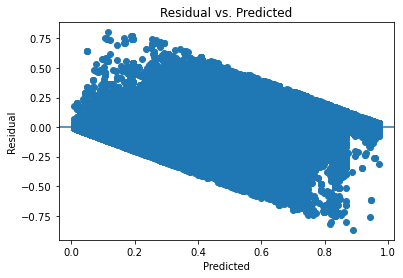

In [189]:
y_pred = best_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Predicted vs Actual Plot

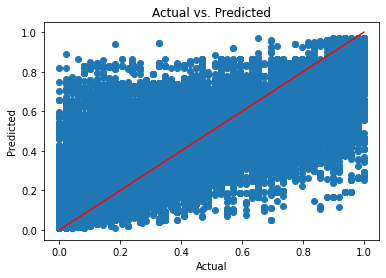

In [190]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

## 5 Fold Basic Cross Validation

In [191]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)

rmse_scores = np.sqrt(-scores)

print('Scores:', rmse_scores)
print('Mean:', rmse_scores.mean())
print('Standard Deviation:', rmse_scores.std())

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

Scores: [0.19829161 0.19988049 0.19822475 0.19838809 0.19812088]
Mean: 0.19858116209590007
Standard Deviation: 0.0006554770598107393


## Multicollinearity

In [192]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_const = sm.add_constant(X)

vif = pd.DataFrame()
vif["variables"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

     variables           VIF
0        const  8.112969e+07
1     latitude  2.253919e+00
2    longitude  2.242077e+00
3         Hour  1.016006e+00
4  Day of Week  1.007567e+00


## Statistical Tests

Feature: 0, Score: 0.30504
Feature: 1, Score: 0.29011
Feature: 2, Score: 0.34916
Feature: 3, Score: 0.05570


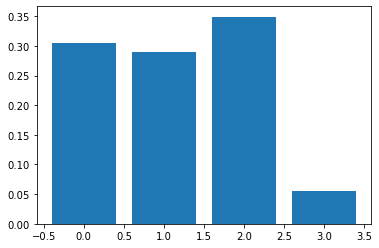

In [193]:
importance = best_model.feature_importances_
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Coefficient of Determination (R-Squared)

In [194]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)

print('R2 score:', score)

R2 score: 0.5481998285618033


## Error Analysis

count    102754.000000
mean          0.000663
std           0.198371
min          -0.870100
25%          -0.126419
50%           0.003179
75%           0.137722
max           0.802078
Name: Normalized_Score, dtype: float64


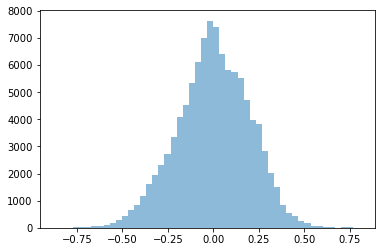

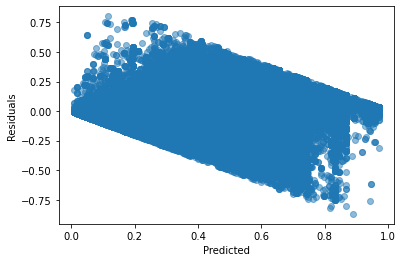

In [195]:
residuals = y_test - y_test_pred

print(residuals.describe())

plt.hist(residuals, bins=50, alpha=0.5)
plt.show()

plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

## Sensitivity Analysis 

In [196]:
X_test_perturbed = X_test.copy()
X_test_perturbed['longitude'] = X_test_perturbed['longitude'] + np.random.normal(0, 0.01, size=len(X_test))
y_test_pred_perturbed = best_model.predict(X_test_perturbed)
mse_test_perturbed = mean_squared_error(y_test, y_test_pred_perturbed)
print('Perturbed Test MSE:', mse_test_perturbed)

Perturbed Test MSE: 0.0706265736663875


## Confidence Intervals 

In [197]:
bootstrap_preds = []
for _ in range(1000):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_test_sample = X_test.iloc[indices]
    y_test_pred_sample = best_model.predict(X_test_sample)
    bootstrap_preds.append(y_test_pred_sample)
bootstrap_preds = np.array(bootstrap_preds)

lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)  # 97.5th percentile

In [198]:
num_samples = 100
indices = np.random.choice(len(X_test), num_samples)

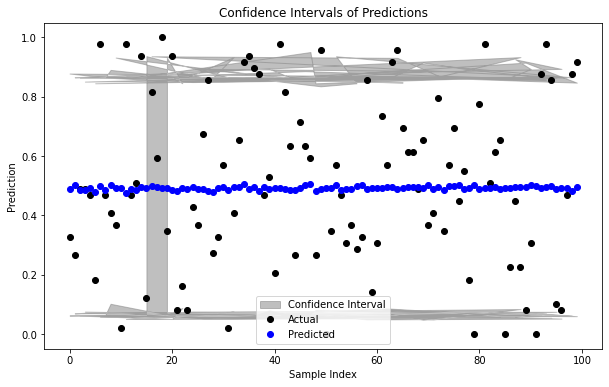

In [199]:
sorted_indices = np.argsort(indices)

plt.figure(figsize=(10, 6))

plt.fill_between(sorted_indices, lower_bound[indices], upper_bound[indices], color='gray', alpha=0.5, label='Confidence Interval')
plt.plot(sorted_indices, y_test.iloc[indices], 'o', color='black', label='Actual')
plt.plot(sorted_indices, bootstrap_preds.mean(axis=0)[indices], 'o', color='blue', label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.title('Confidence Intervals of Predictions')
plt.legend()
plt.show()

## Check for overfitting

In [200]:
y_train_pred = best_model.predict(X_full_train)
mse_train = mean_squared_error(y_full_train, y_train_pred)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 0.03847563876971455
Test MSE: 0.039350964682621094


In [201]:
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print('Train MSE:', mse_train)
print('Validation MSE:', mse_val)

Train MSE: 0.03847563876971455
Validation MSE: 0.03848917080484836


***

## Model Evaluation Results

The model's performance has been evaluated using the Mean Squared Error (MSE) metric, which calculates the average squared differences between the predicted and actual values. Lower values of MSE indicate a better fit of the model to the data.

1. <b>Training MSE vs Test MSE:</b> The MSE for the training set is 0.0385 and for the test set, it's 0.0394. The test MSE is slightly higher than the training MSE, but the difference between the two is minimal. This indicates that the model is generalizing well to unseen data, as it performs nearly as well on the test set as it does on the data it was trained on. Therefore, these metrics do not suggest any significant overfitting.

2. <b>Training MSE vs Validation MSE:</b> Similarly, when we look at the MSE for the validation set (0.0385), we see that it is almost identical to the training MSE. This is a further indication that the model is not overfitting, as it performs just as well on a validation set (which it hasn't been trained on) as it does on the training data.

 In this case, our model seems to generalize well and does not show signs of overfitting, given the similarity of MSE scores across the training, validation, and test sets.

***

## 10 Fold Cross Validation Results

In [202]:
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False), 
    'mae': make_scorer(mean_absolute_error, greater_is_better=False), 
    'r2': 'r2',
}

In [203]:
cv_results = cross_validate(best_model, X_full_train, y_full_train, cv=10, scoring=scoring, return_train_score=True)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

In [204]:
print("Train MSE:", -cv_results['train_mse'].mean()) 
print("Validation MSE:", -cv_results['test_mse'].mean()) 
print("Train MAE:", -cv_results['train_mae'].mean()) 
print("Validation MAE:", -cv_results['test_mae'].mean())
print("Train R^2 scores:", cv_results['train_r2'].mean())
print("Validation R^2 scores:", cv_results['test_r2'].mean())

Train MSE: 0.03841119306257187
Validation MSE: 0.03939139805457937
Train MAE: 0.15542654830748803
Validation MAE: 0.15765674928012724
Train R^2 scores: 0.5596823280565493
Validation R^2 scores: 0.548419341874245


***

## 10 Fold Cross Validation

After conducting an extensive 10-fold cross-validation, we can gain insights into the performance of the model and the robustness of our results. By splitting our data into 10 folds and running separate training and validation processes on each, we minimize the influence of any potential outlier folds and ensure that our model generalizes well across different parts of our dataset.

## Mean Squared Error (MSE)

MSE is an often-used metric in regression analysis that calculates the average of the squared differences between the actual and predicted values. The MSE for our model is 0.03841 for the training data and 0.03939 for the validation data. These numbers are relatively close to each other, suggesting that the model generalizes well to unseen data.

## Mean Absolute Error (MAE)

The MAE measures the average absolute difference between the predicted and actual values, giving us a straightforward measure of the magnitude of our model's errors. The MAE for our model is 0.15543 on the training data and 0.15765 on the validation data, which indicates that our model has a relatively low average error magnitude.

## R² Score (Coefficient of Determination)

The R² score, also known as the coefficient of determination, provides a measure of how well future samples are likely to be predicted by the model. Our model has R² scores of 0.55968 for the training set and 0.54842 for the validation set, suggesting that approximately 55% of the variance in our target variable can be explained by our features.

## Conclusion

In summary, the model shows relatively good performance based on our MSE, MAE, and R² scores from the 10-fold cross-validation. The similar performance on both training and validation sets indicates that our model is not overfitting and is likely to generalize well to new, unseen data. However, as always, we should consider these results in the context of our specific use case and keep exploring potential opportunities for further improving our model.

***

## Create and test the pkl file

In [208]:
filename = 'final_crime_weekend_taxi_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [209]:
loaded_model = pickle.load(open(filename, 'rb'))

In [207]:
single_instance = X_test.iloc[0]
single_prediction = loaded_model.predict(single_instance.values.reshape(1, -1))
print('Single prediction:', single_prediction)

Single prediction: [0.73160988]


/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
